**Q1-Set1)	Look at the data. Plot the data, find the outliers and find out  μ,σ,σ^2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])
X

0     24.23
1     25.53
2     25.41
3     24.14
4     29.62
5     28.25
6     25.81
7     24.39
8     40.26
9     32.95
10    91.36
11    25.99
12    39.42
13    26.71
14    35.00
dtype: float64

In [ ]:
name=['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers',
      'Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways',
      'Warner-Lambert']

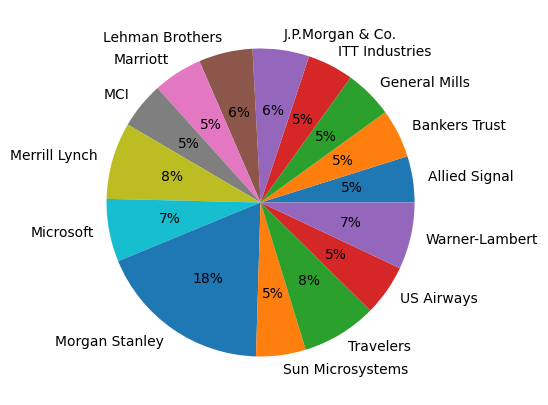

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(X,labels=name,autopct="%1.0f%%")
plt.show()

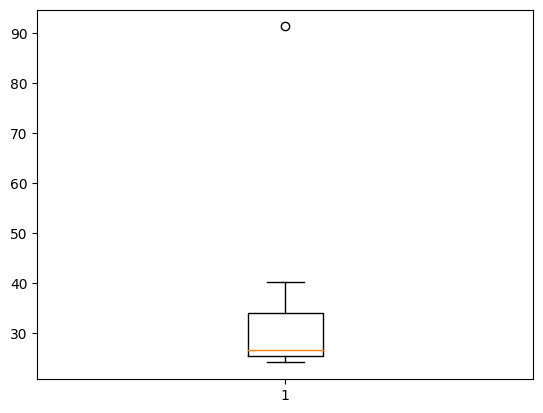

In [ ]:
plt.boxplot(X)
plt.show()

In [ ]:
X.mean()

33.27133333333333

In [ ]:
X.std()

16.945400921222028

In [ ]:
X.var()

287.1466123809524

**Q4-Set1)AT&T was running commercials in 1990 aimed at luring back customers who had switched to one of the other long-distance phone service providers. One such commercial shows a businessman trying to reach Phoenix and mistakenly getting Fiji, where a half-naked native on a beach responds incomprehensibly in Polynesian. When asked about this advertisement, AT&T admitted that the portrayed incident did not actually take place but added that this was an enactment of something that “could happen.” Suppose that one in 200 long-distance telephone calls is misdirected. What is the probability that at least one in five attempted telephone calls reaches the wrong number?**

In [ ]:
table=[["Correct","Incorrect"] for i in range(1)]+ \
[["Incorrect","Correct"] for i in range(4)]

In [ ]:
df=pd.DataFrame(table,columns=["Correct_or_Incorrect", "Incorrect_or_Correct"])
df

,Correct_or_Incorrect,Incorrect_or_Correct
0,Correct,Incorrect
1,Incorrect,Correct
2,Incorrect,Correct
3,Incorrect,Correct
4,Incorrect,Correct


In [ ]:
df_cross=pd.crosstab(df["Correct_or_Incorrect"],df["Incorrect_or_Correct"], margins=True,margins_name="Total")
df_cross

Incorrect_or_Correct,Correct,Incorrect,Total
Correct_or_Incorrect,,,
Correct,0,1,1
Incorrect,4,0,4
Total,4,1,5


In [ ]:
from scipy.stats import chi2_contingency
data=[[0,1],[4,1]]
print(chi2_contingency(data))
stats,p,dof,expected=chi2_contingency(data)

alpha=0.05
if p>alpha:
    print("Accept Null H - The call connects incorrectly " + str(p))
else:
    print("Reject Null H - The call connects correctly")

Chi2ContingencyResult(statistic=0.15, pvalue=0.6985353583033387, dof=1, expected_freq=array([[0.66666667, 0.33333333],
       [3.33333333, 1.66666667]]))
Accept Null H - The call connects incorrectly 0.6985353583033387


**Q5-Set2)Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
B.	Specify the 5th percentile of profit (in Rupees) for the company
C.	Which of the two divisions has a larger probability of making a loss in a given year?**


In [ ]:
import numpy as np
from scipy import stats

In [ ]:
Mean=5+7
print("Mean Profit is Rs.", Mean*45, "Million")

Mean Profit is Rs. 540 Million


In [ ]:
SD=np.sqrt((9)+(16))
print("SD is",SD*45,"Million")

SD is 225.0 Million


In [ ]:
#A) Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
stats.norm.interval(0.95,540,225)

(99.00810347848784, 980.9918965215122)

In [ ]:
#B)Specify the 5th percentile of profit (in Rupees) for the company.
#5th percentile from Z table = -1.645
X=540+(-1.645)*(225)
np.round(X)

170.0

In [ ]:
#C)Which of the two divisions has a larger probability of making a loss in a given year?
a=stats.norm.cdf(0,5,3)
b=stats.norm.cdf(0,7,4)
a,b

(0.0477903522728147, 0.040059156863817086)

**Q3-Set4)Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?
A.	1.25%
B.	2.5%
C.	10.55%
D.	21.1%
E.	50%**

In [6]:
#pop.m=50
#pop.std=40
#n=100
import numpy as np
from scipy import stats
#For(45<x<55)
z=(45-50)/(40/np.sqrt(100))
z

-1.25

In [7]:
stats.norm.cdf(1.25)-stats.norm.cdf(-1.25)

0.7887004526662893

In [10]:
stats.norm.interval(0.7887,50,45/np.sqrt(100))

(44.375005576257664, 55.624994423742336)

In [11]:
#For1-(45<x<55)
1-0.7887

0.21130000000000004

**Q4-Set4)The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.
A.	144
B.	150
C.	196
D.	250
E.	Not enough information**


In [34]:
stats.norm.ppf(0.525)

0.06270677794321385

In [33]:
#50=0.0627(40/np.sqrt(n))
n=0.0627*40/50*50
n*100

250.8